# Pair Programming 27/05 Test Estadísticos III - Tatiana y Guada

In [2]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 

Usaremos el dataset de listings_limpio-2 en el caso que no hayamos llegado a terminar el pair de ayer. Si tenéis el csv de ayer es preferido que uséis ese.

In [19]:
df = pd.read_csv("listing_nuevo2.csv", index_col=0)
df.head(2)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,1,149,3
1,Latina,Private room,31,4,33,2,131,0


# Ejercicio 1
Chequead los outliers y haced la gestión de ellos, como aprendimos en las lecciones de limpieza.

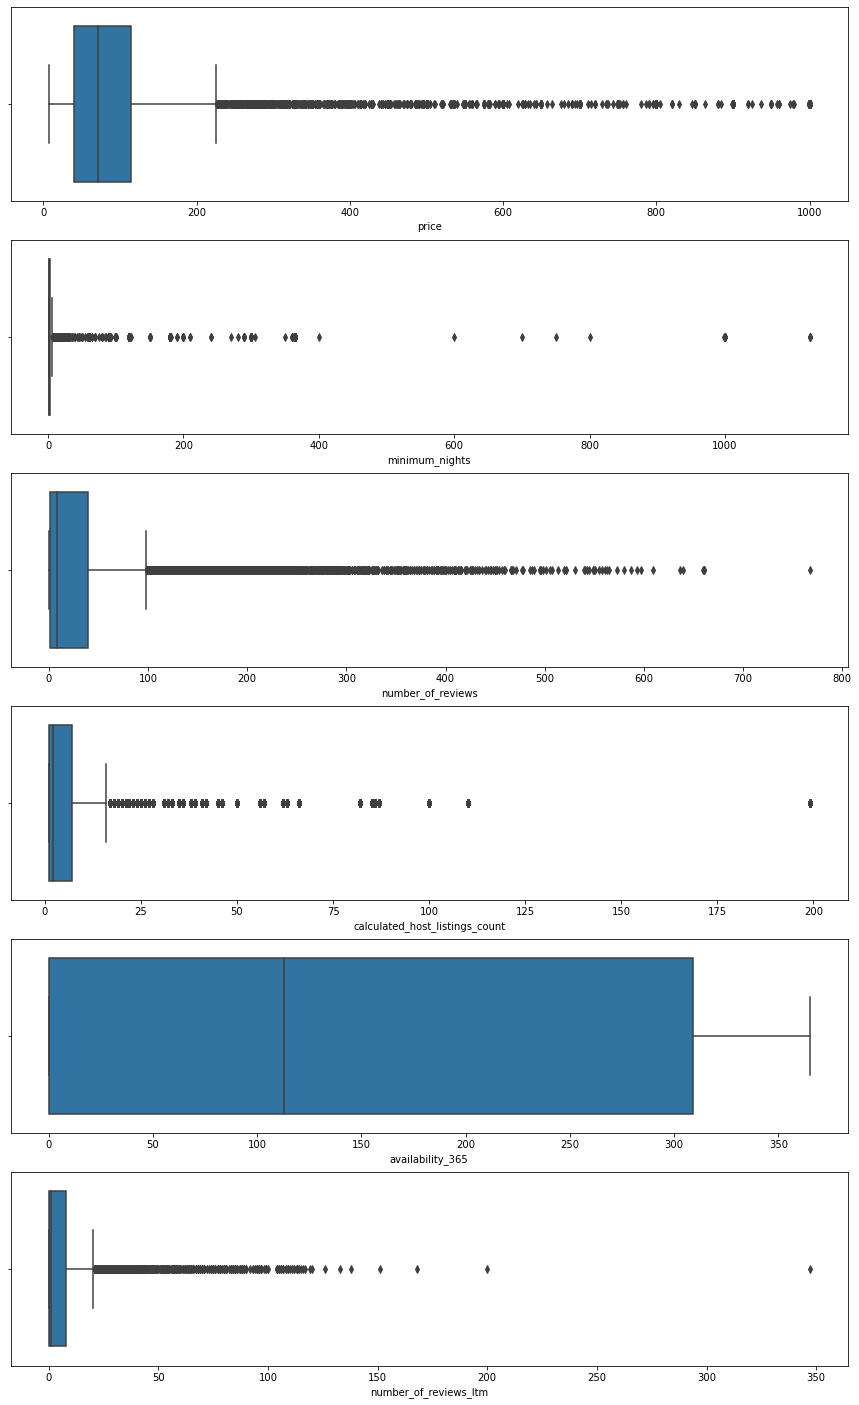

In [20]:
numericas = df.select_dtypes(include=['int64', 'float64'])

fig, axes = plt.subplots(6, 1, figsize=(15,25))

for i in range(len(numericas.columns)):
    sns.boxplot(x = numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

In [21]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila.
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices

In [22]:
numericas.median()

price                              71.0
minimum_nights                      2.0
number_of_reviews                   8.0
calculated_host_listings_count      2.0
availability_365                  113.0
number_of_reviews_ltm               1.0
dtype: float64

In [23]:
ind = detectar_outliers(numericas, df)
ind.keys()

dict_keys(['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm'])

In [44]:
df["room_type"].value_counts()

Entire home/apt    10588
Private room        6197
Shared room          225
Hotel room           133
Name: room_type, dtype: int64

In [25]:
# hacemos un for loop para iterar por el diccionario y acceder a las columnas y filas 
# y reemplazar los valores por la mediana

for k, v in ind.items():
    
    median = df[k].median()
   
    for i in v: 
            df.loc[i,k] = median
    else:
        pass



In [27]:
df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17143.000000,17143.000000,17143.000000,17143.000000,17143.000000,17143.000000
mean,74.991425,2.000467,15.190048,2.851135,150.251240,2.871143
std,44.507680,1.086021,21.770478,3.010735,139.254279,4.676555
min,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,71.000000,2.000000,8.000000,2.000000,113.000000,1.000000
75%,97.000000,2.000000,19.000000,3.000000,309.000000,4.000000
max,225.000000,6.000000,98.000000,16.000000,365.000000,20.000000


# Ejercicio 2
¿Sigue la columma price una distribución normal? Chequeadlo visual y analiticamente.
En caso de que no siga una distribución normal, realizad la transformación necesaria para que se ajuste a una normal.

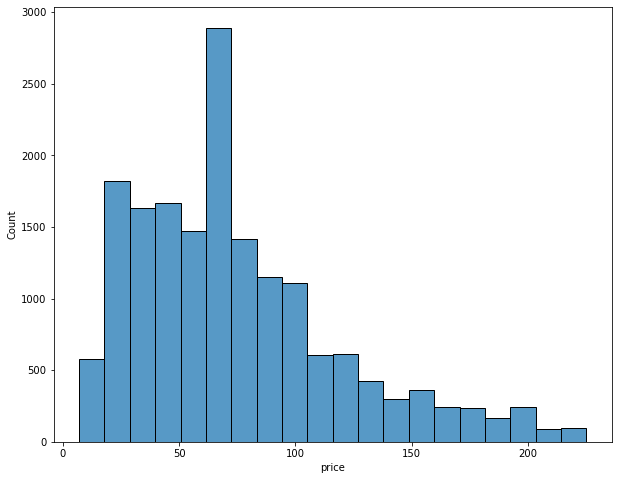

In [28]:
sns.histplot(df["price"],  bins=20);

👩🏻👩🏻‍🦰💬

Visualmente comprobamos que no tiene una distribución normal, ya que no tiene forma de campana de Gauss

In [30]:
stats.shapiro(df["price"].sample(5000))

ShapiroResult(statistic=0.9274393916130066, pvalue=5.74532370373175e-44)

In [31]:
df["price"], lambda_ajustada = stats.boxcox(df["price"])

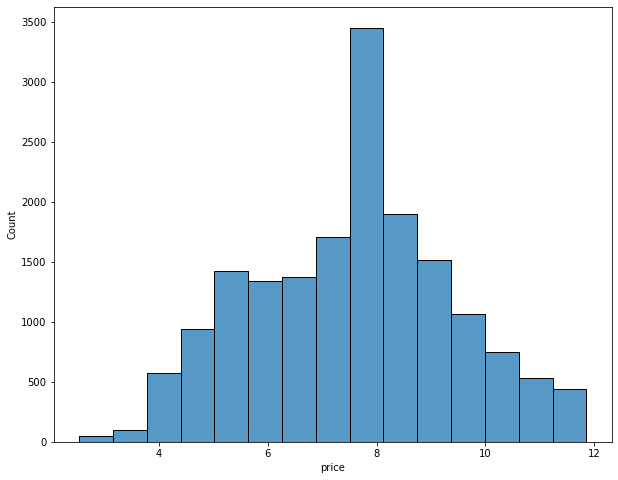

In [33]:
sns.histplot(df["price"],  bins=15);

👩🏻👩🏻‍🦰💬

Visualmente comprobamos que ahora si tiene una distribución normal.

# Ejercicio 3
Chequead la independencia entre las siguientes columnas: neighbourhood_group y room_type

In [34]:
crosstab, test_results, expected = rp.crosstab(df["neighbourhood_group"], df["room_type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [35]:
crosstab.head()

room_type                                           
room_type           Entire home/apt Hotel room Private room Shared room    All
neighbourhood_group                                                           
Arganzuela                     3.30       0.01         2.22        0.02   5.54
Barajas                        0.25       0.00         0.53        0.01   0.79
Carabanchel                    1.41       0.01         2.02        0.02   3.46
Centro                        33.41       0.59        10.74        0.64  45.38
Chamartín                      1.79       0.02         1.07        0.03   2.91

In [36]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 60.0) =,1843.7483
1,p-value =,0.0000
2,Cramer's V =,0.1893


👩🏻👩🏻‍🦰💬

Como vemos en la tabla de arriba, nuestro Cramer´s V es 0.18, lo que indica que nuestra independencia es baja.

# Ejercicio 4
Chequead la heterocedasticidad de la columna room_type frente al price

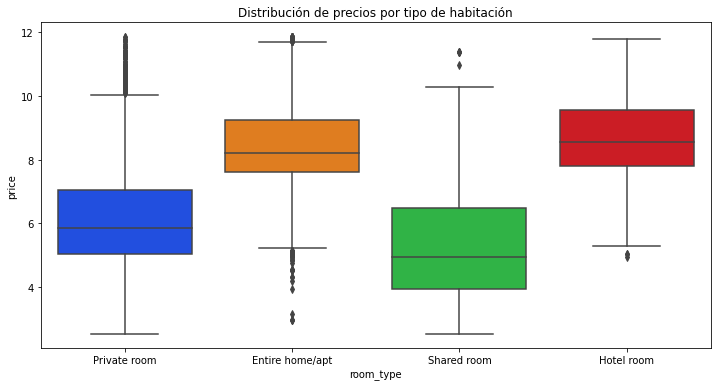

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.boxplot(
    x       = 'room_type',
    y       = 'price',
    data    = df,
    palette = 'bright',
    ax      = ax
)
ax.set_title('Distribución de precios por tipo de habitación')
ax.set_xlabel('room_type')
ax.set_ylabel('price');

👩🏻👩🏻‍🦰💬

Podmeos observar que en nuestro subsplot, los resultados son diferentes entre si, por lo que se aprecia la heterocedasticidad. La probabilidad real de cometer un error de tipo I es mayor que la devuelta por el test y los intervalos de confianza verdaderos serán más amplios que los calculados. Recordamos que el error tipo I sucede si rechazamos la hipótesis nula cuando es verdadera.